In [29]:
import yfinance as yf

In [30]:
# using yf tickermodel to access ticker data
nvda = yf.Ticker("NVDA")

In [31]:
nvda.info

{'address1': '2788 San Tomas Expressway',
 'city': 'Santa Clara',
 'state': 'CA',
 'zip': '95051',
 'country': 'United States',
 'phone': '408 486 2000',
 'website': 'https://www.nvidia.com',
 'industry': 'Semiconductors',
 'industryKey': 'semiconductors',
 'industryDisp': 'Semiconductors',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': "NVIDIA Corporation provides graphics and compute and networking solutions in the United States, Taiwan, China, Hong Kong, and internationally. The Graphics segment offers GeForce GPUs for gaming and PCs, the GeForce NOW game streaming service and related infrastructure, and solutions for gaming platforms; Quadro/NVIDIA RTX GPUs for enterprise workstation graphics; virtual GPU or vGPU software for cloud-based visual and virtual computing; automotive platforms for infotainment systems; and Omniverse software for building and operating metaverse and 3D internet applications. The Compute & Networki

In [32]:
# access specific attribute from the dictionary
nvda.info["website"]

'https://www.nvidia.com'

In [33]:
# download daily stock price data by passing specific ticker and dat range
from datetime import datetime
today_date = datetime.today().strftime("%Y-%m-%d")
print(today_date)
data = yf.download("NVDA",start="2020-01-01",end = today_date)

[*********************100%%**********************]  1 of 1 completed

2024-08-16


In [34]:
# view first few rows
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-02,5.96875,5.99775,5.91800,5.99775,5.973633,237536000
2020-01-03,5.87750,5.94575,5.85250,5.90175,5.878018,205384000
2020-01-06,5.80800,5.93175,5.78175,5.92650,5.902668,262636000
2020-01-07,5.95500,6.04425,5.90975,5.99825,5.974132,314856000
2020-01-08,5.99400,6.05100,5.95375,6.00950,5.985337,277108000


In [35]:
# view last few row
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-08-09,105.639999,106.599998,103.430000,104.750000,104.750000,290844200
2024-08-12,106.320000,111.070000,106.260002,109.019997,109.019997,325559900
2024-08-13,112.440002,116.230003,111.580002,116.139999,116.139999,312646700
2024-08-14,118.529999,118.599998,114.070000,118.080002,118.080002,339246400
2024-08-15,118.760002,123.239998,117.470001,122.860001,122.860001,316612000


In [36]:
# check dimension/size
data.shape

(1163, 6)

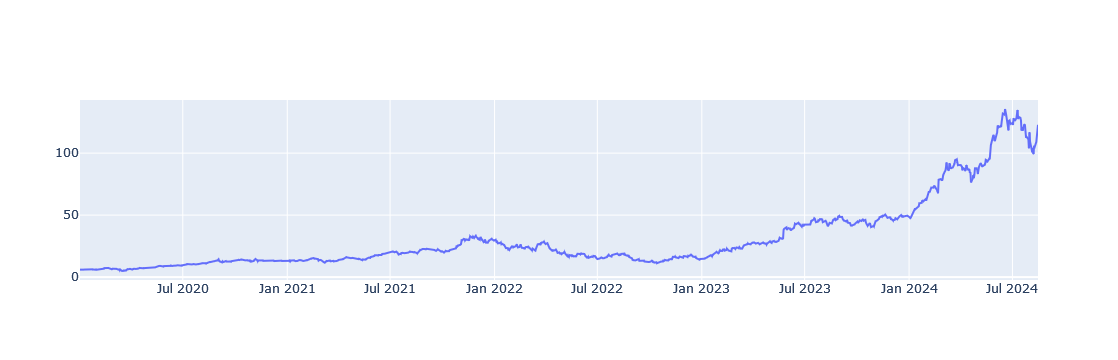

In [37]:
# plot closing price as a time series chart
import plotly.graph_objects as go

fig = go.Figure(data=go.Scatter(x=data.index,y=data["Close"],mode = 'lines'))
fig.show()

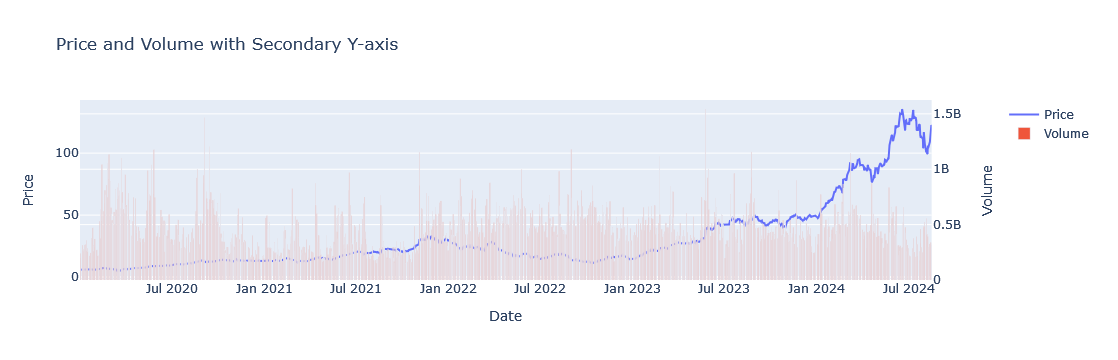

In [50]:
# overlay the trading volume
from plotly.subplots import make_subplots
fig2 = make_subplots(specs=[[{"secondary_y": True}]])

# add trace from "Close" price on the primary y-axis
fig2.add_trace(
    go.Scatter(x=data.index, y=data["Close"],name = "Price"),secondary_y=False)

#add trace for 'Volume' on the secondary axis
fig2.add_trace(
    go.Bar(x=data.index,y=data['Volume'],name='Volume'),secondary_y =True)
# update layout
fig2.update_layout(title_text='Price and Volume with Secondary Y-axis',xaxis_title='Date',yaxis_title='Price',yaxis2_title='Volume')
#show the figure
fig2.show()

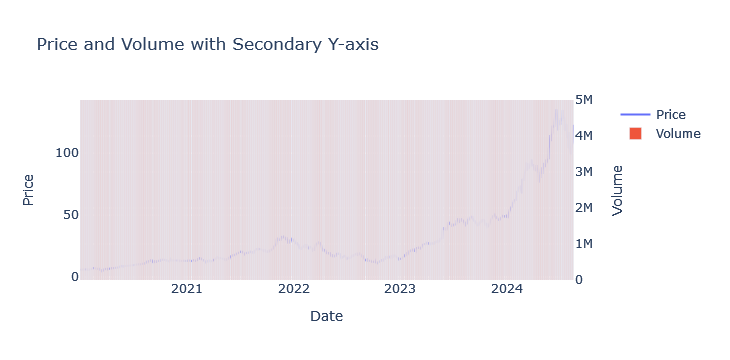

In [56]:
fig2.update_yaxes(range=[0,5000000],secondary_y = True)
fig2.update_yaxes(visible=True, secondary_y = True)
fig2

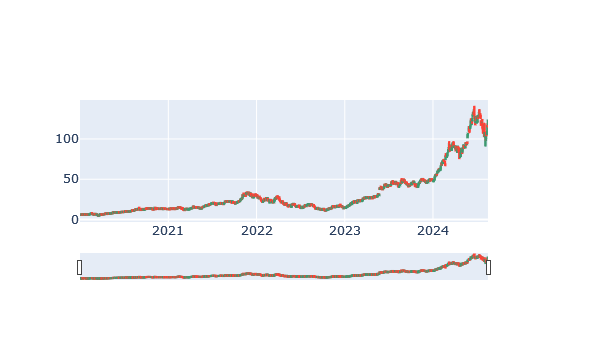

In [60]:
#switch to candlestick chart
fig3 = make_subplots(specs=[[{'secondary_y': True}]])
fig3.add_trace(go.Candlestick(x=data.index,open=data['Open'],high=data['High'],low=data['Low'],close=data['Close']))